# load

## raw(ish) data

In [18]:
using RCall
R"""
library(readr)
library(dplyr)
library(stringr)
d = read_tsv('amino_acid_genotypes_to_brightness.tsv', comment="#")
d = d %>% filter(!str_detect(aaMutations, "\\*")) %>%
    transmute(mut = str_replace_all(aaMutations, "(?<=(^|\\:))S", ""),
              f = medianBrightness, v = std)
"""
@rget d
d[:v] = d[:v].^2
d

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

cols(
  aaMutations = col_character(),
  uniqueBarcodes = col_integer(),
  medianBrightness = col_double(),
  std = col_double()
)
Warning in rbind(names(probs), probs_f) :
  number of columns of result is not a multiple of vector length (arg 1)
row # A tibble: 5 x 5 col     row col   expected  actual    file                                     expected   <int> <chr> <chr>     <chr>     <chr>                                    actual 1     1 <NA>  4 columns 3 columns 'amino_acid_genotypes_to_brightness.tsv' file 2     2 <NA>  4 columns 3 columns 'amino_acid_genotypes_to_brightness.tsv' row 3     3 <NA>  4 columns 3 columns 'amino_acid_genotypes_to_brightness.tsv' col 4     5 <NA>  4 columns 3 columns 'amino_acid_genotypes_to_brightness.tsv' expected 5     6 <NA>  4 columns 3 columns 'amino_ac

51714×3 DataFrames.DataFrame. Omitted printing of 1 columns
│ Row   │ mut                                                 │ f       │
├───────┼─────────────────────────────────────────────────────┼─────────┤
│ 1     │ A108D                                               │ 1.30103 │
│ 2     │ A108D:N144D:I186V:M231T:L234P                       │ 1.30103 │
│ 3     │ A108D:Y141N:H146L:E220G                             │ 1.30119 │
│ 4     │ A108G                                               │ 3.70848 │
│ 5     │ A108G:K138M:R166C:L234P                             │ 3.58276 │
│ 6     │ A108G:K154E:F163S:L192Q:L193P                       │ 1.49957 │
│ 7     │ A108G:K156R                                         │ 3.65901 │
│ 8     │ A108G:K156R:I159V:I186V:T223S                       │ 3.57385 │
│ 9     │ A108P:K111R:G172S:L176P:S200G                       │ 1.30103 │
│ 10    │ A108S                                               │ 3.87297 │
│ 11    │ A108S:D127G:S145G:Q182R:N183S:L205Q                 │ 1.30103 │
⋮
│ 51703 │ Y90N:D100N:R213C                                    │ 1.30103 │
│ 51704 │ Y90N:D101V:E109G:D188V:S203F                        │ 1.61352 │
│ 51705 │ Y90N:F112L:M151I                                    │ 1.30018 │
│ 51706 │ Y90N:F97S:T116A:V217I                               │ 1.3665  │
│ 51707 │ Y90N:F98Y:K105T:V110A:Y143C:D153V:I165T:L205P:D232G │ 1.56592 │
│ 51708 │ Y90N:K105R:F221L                                    │ 1.44423 │
│ 51709 │ Y90N:K99R:A204T:E220G                               │ 1.52952 │
│ 51710 │ Y90N:N103S:I169F                                    │ 1.55209 │
│ 51711 │ Y90N:Q175L:L205Q:T228A:M231V                        │ 1.30103 │
│ 51712 │ Y90R:I150N:N196S                                    │ 1.30103 │
│ 51713 │ Y90R:I165T:L234P                                    │ 1.30152 │
│ 51714 │ Y90S:N103D:K105E:F128L:I150V                        │ 1.30213 │

## prep data

In [19]:
using GlobalEpistasis

In [9]:
data = prepdata(d, :mut, :listofmuts, "WT", :f, delim=':', vname = :v)

Dict{Symbol,Any} with 9 entries:
  :ham  => [1, 5, 4, 1, 4, 5, 2, 5, 5, 1  …  3, 4, 9, 3, 4, 3, 5, 3, 3, 5]
  :wt   => "WT"
  :pos  => [108, 144, 186, 231, 234, 141, 146, 220, 108, 138  …  111, 141, 207,…
  :aa   => ['D', 'D', 'V', 'T', 'P', 'N', 'L', 'G', 'G', 'M'  …  'V', 'I', 'D',…
  :y    => [1.30103, 1.30103, 1.30119, 3.70848, 3.58276, 1.49957, 3.65901, 3.57…
  :code => Dict("Q67R"=>130,"V91T"=>1786,"K111N"=>1496,"P190T"=>755,"G18D"=>884…
  :v    => Any[0.0, 0.0, 0.0, 0.000424882, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0…
  :g    => Bool[false, true, true, true, true, true, true, true, true, true  … …
  :x    => …

## precomputed models

In [20]:
using JLD
@load "inferred.jld"

9-element Array{Symbol,1}:
 :data         
 :dl_lin_nonlin
 :dl_m01_m11   
 :dl_m10_m11   
 :m            
 :m01          
 :m11          
 :mb           
 :mlin         

## plotting libraries

In [21]:
using RCall
R"""
library(tidyr)
library(ggplot2)
library(cowplot)
options(device = function(filename=getOption('rcalljl_filename'),...) png(filename, width=600, height=600, ...))
""";

# non-epistatic model

In [11]:
@time mlin = nonepistatic_model(data)

  7.450212 seconds (2.19 M allocations: 543.596 MiB, 4.82% gc time)


Dict{Symbol,Any} with 12 entries:
  :b            => [-0.116954, -0.117227, -0.025741, 0.166829, -0.1536, 0.00306…
  :r2           => 0.718635
  :prediction   => 51715×2 DataFrames.DataFrame…
  :sigma2p      => 0.224374
  :phi          => [-0.116954, -1.34635, -1.54962, -2.7071, -0.444462, -0.59347…
  :yhat         => [-0.116954, -1.34635, -1.54962, -2.7071, -0.444462, -0.59347…
  :sigma2       => 0.0976938
  :data         => Dict{Symbol,Any}(Pair{Symbol,Any}(:ham, [0, 1, 5, 4, 1, 4, 5…
  :nlopt_return => :SUCCESS
  :rmse         => 0.561712
  :beta         => 1810×3 DataFrames.DataFrame…
  :ll           => 4316.01

## prediction vs observed

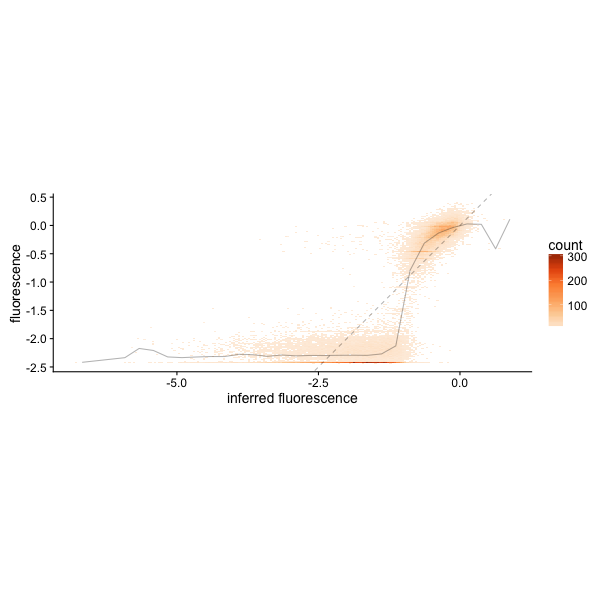

RCall.RObject{RCall.VecSxp}


In [13]:
R"""
plot.model.linear = qplot(x=$(mlin[:phi]), y=$(mlin[:data][:y]), 
    geom="bin2d", bins=200) +
    geom_abline(alpha=0.3, linetype=2) + coord_fixed() +
    scale_fill_distiller(palette=7, direction=1) +
    stat_summary_bin(geom="line", fun.y=mean, alpha=0.3, bins=30) + 
    labs(x="inferred fluorescence", y="fluorescence")
"""

## cross-validate
should take a long time

In [15]:
cvyhatmlin = cvpredict(data, nonepistatic_model, 10)

1

2

3

4

5

6

7

8

9

10

"10 fold cross-validated correlation 0.8303848263142414"

51715-element Array{Float64,1}:
 -0.113871
 -1.31096 
 -1.52863 
 -2.72393 
 -0.516851
 -0.628293
 -1.19592 
 -0.381725
 -0.568055
 -1.53243 
 -0.320982
 -1.37979 
 -0.448426
  ⋮       
 -0.99033 
 -3.18687 
 -1.14832 
 -1.07109 
 -2.75861 
 -0.94843 
 -1.30997 
 -1.2506  
 -1.47006 
 -2.68891 
 -1.75176 
 -1.59009 

# global epistasis

## fit

In [ ]:
@time m = fit(mlin)

## write parameters in csv

In [18]:
using DataFrames
beta = DataFrame(b = m[:bg], pos=data[:pos], aa=data[:aa])
CSV.write("beta.csv", beta)
pred = DataFrame(y = data[:y], yhat = m[:yhat], phi = m[:phiG])
CSV.write("predictions.csv", pred)

CSV.Sink{Void,DataType}(    CSV.Options:
        delim: ','
        quotechar: '"'
        escapechar: '\\'
        missingstring: ""
        dateformat: nothing
        decimal: '.'
        truestring: 'true'
        falsestring: 'false', IOBuffer(data=UInt8[...], readable=true, writable=true, seekable=true, append=false, size=0, maxsize=Inf, ptr=1, mark=-1), "predictions.csv", 11, true, String["y", "yhat", "phi"], 3, false, Val{false})

## cross validate
takes a long time

In [ ]:
cvyhat = cvpredict(data, fit, 10, nk=4, tol=1e-14)

## bootstrap
caution: this will take a very long time

In [ ]:
mb = boot(m, 1000)

In [14]:
b_boot, a_boot, g_boot = boot_stats(m, mb)

"beta 1810, positive 141, deleterious 1131, neutral 538 "

"beta average 95% CI width 0.9118724175934579"

"beta average SE, 0.011277254136507157"

"g(phi) average CI 0.17970205258987257"

"g(phi) boundary [-2.99816, -2.92802]"

(1810×9 DataFrames.DataFrame. Omitted printing of 3 columns
│ Row  │ name │ med        │ upper      │ lower      │ se          │ b         │
├──────┼──────┼────────────┼────────────┼────────────┼─────────────┼───────────┤
│ 1    │ 1E   │ -0.351362  │ -0.309716  │ -0.389882  │ 0.000650418 │ -0.360796 │
│ 2    │ 1M   │ -0.141372  │ -0.0975706 │ -0.188565  │ 0.000752598 │ -0.137829 │
│ 3    │ 1N   │ -0.174675  │ 0.372244   │ -0.645184  │ 0.0083906   │ -0.173022 │
│ 4    │ 1Q   │ -0.0568998 │ 0.292459   │ -0.570761  │ 0.00771342  │ -0.070489 │
│ 5    │ 1R   │ -0.206845  │ -0.140082  │ -0.279189  │ 0.0011252   │ -0.19801  │
│ 6    │ 1T   │ -0.367352  │ -0.088261  │ -0.633664  │ 0.00454884  │ -0.342728 │
│ 7    │ 10A  │ -1.97831   │ -1.88585   │ -2.04038   │ 0.00125447  │ -2.01404  │
│ 8    │ 10E  │ -2.65997   │ -2.52825   │ -2.7502    │ 0.00176197  │ -2.69971  │
│ 9    │ 10G  │ -2.52041   │ -1.89647   │ -2.67957   │ 0.00597287  │ -2.61838  │
│ 10   │ 10M  │ -1.07177   │ -0.845699  │ -1.1427

## plot non-linear curve

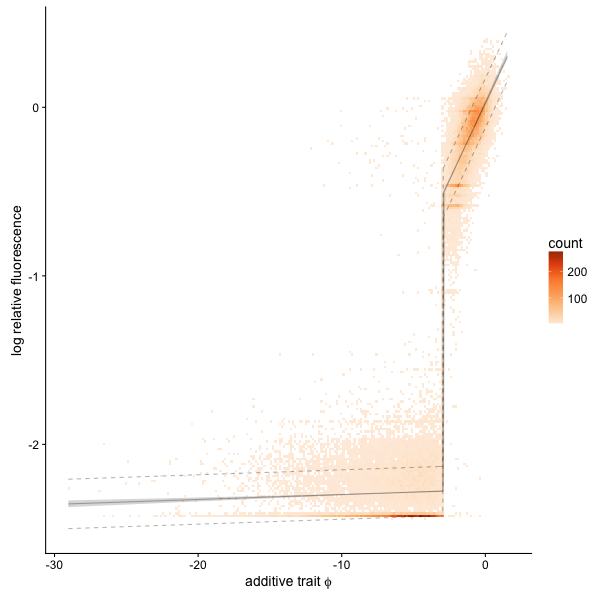

RCall.RObject{RCall.VecSxp}


In [20]:
R"""
sigmaep = sqrt($(m[:sigma2]))
plot.GFP = qplot(x=$(m[:phiG]), y=$(data[:y]), geom = "bin2d", bins=200) +
scale_fill_distiller(palette=7, direction=1) + 
geom_line(aes(y=yhat, x=phiG), $g_boot, alpha = 0.3) + 
geom_ribbon(aes(x=phiG, ymin = yhat_lower, ymax = yhat_upper), $g_boot, alpha=0.2, inherit.aes=FALSE) +
geom_line(aes(y=yhat+2*sigmaep, x=phiG), $g_boot, alpha=0.3, linetype=2) + 
geom_line(aes(y=yhat-2*sigmaep, x=phiG), $g_boot, alpha=0.3, linetype=2) + 
xlab(expression(paste("additive trait ", phi))) +
ylab("log relative fluorescence")
"""

## plot betas

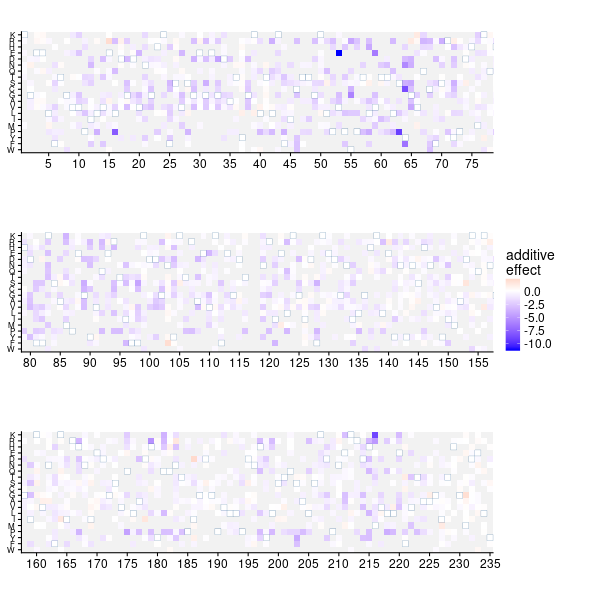

RCall.RObject{RCall.VecSxp}


In [17]:
aalev = reverse(["K", "R", "H", "E", "D", "N","Q","T","S","C","G","A","V","L","I","M","P", "Y", "F", "W"])
wtdf = DataFrame(pos = [p for (p,a) in data[:wt]], aa = [a for (p,a) in data[:wt]])
R"""
beta = data.frame(b=$(m[:bg]), pos=$(data[:pos]), aa = factor($(data[:aa]), levels=$aalev))

plot.beta1 <- ggplot(data=beta, aes(x=pos, y=factor(aa, 
levels=$aalev), fill=b)) + geom_tile() +
scale_fill_gradient2(high="red", low="blue") +
#scale_color_gradient2(high="red", low="blue", guide="none") +
geom_tile(aes(x=pos, y=aa, color=0.0, fill=0), $wtdf) + scale_color_continuous(guide="none") +
scale_x_continuous(breaks=seq(0,235, 5)) +
ylab("amino acid") +
xlab("position") +
labs(fill = "additive\neffect") + 
theme(panel.grid = element_blank(), axis.title = element_blank(),
      panel.background = element_rect(fill = "grey95", color="grey95"),
        axis.text.y = element_text(size=8))


plot.beta.legend = get_legend(plot.beta1)
plot.beta = plot_grid(


plot.beta1 + coord_fixed(expand=FALSE, xlim=c(0.5,78.5)) + theme(legend.position="none"), NULL,
plot.beta1 + coord_fixed(expand=FALSE, xlim=c(78.5,157.5)) + theme(legend.position="none"), plot.beta.legend,
plot.beta1 + coord_fixed(expand=FALSE, xlim=c(157.5,235.5)) + theme(legend.position="none"), NULL,

ncol=2, nrow=3, align="v", axis='1', rel_widths=c(1,0.2))
"""

## bootstrapped betas

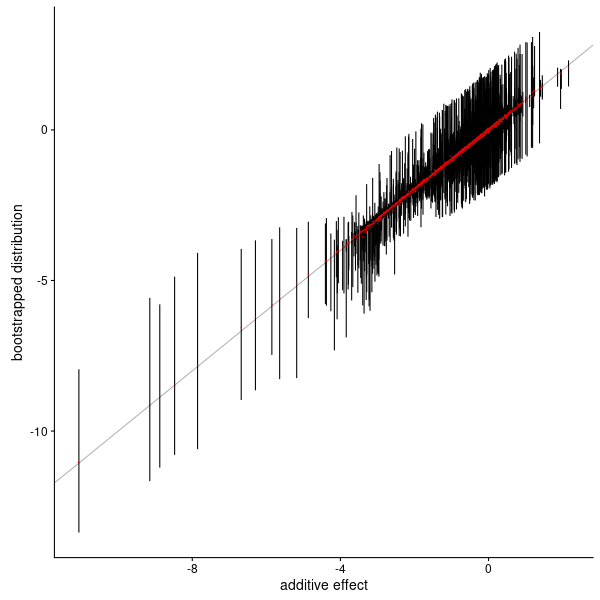

RCall.RObject{RCall.VecSxp}


In [15]:
R"""
plot.bbeta = qplot(data=$b_boot, x=b, y=med, ymin = lower, ymax=upper, size=I(.5),
    geom="linerange", xlab="additive effect", ylab="bootstrapped distribution") +
    geom_point(size=0.2, color="red", alpha=0.5) + geom_abline(alpha=0.3)
"""

## classificiation

In [22]:
TP=sum((m[:phi] .> 0.5) .& (data[:y] .> -1.25))
FP=sum((m[:phi] .> 0.5) .& (data[:y] .< -1.25))
FN=sum((m[:phi] .< 0.5) .& (data[:y] .> -1.25))
TN=sum((m[:phi] .< 0.5) .& (data[:y] .< -1.25))
display(TP/(TP+FN))
display(TN/(TN+FP))

0.9966103947893128

0.9786801091430422

## stabilities


	Pearson's product-moment correlation

data:  `#JL`$bstab$b and `#JL`$bstab$delta_deltaG
t = 1.2272, df = 1027, p-value = 0.22
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.02290152  0.09914598
sample estimates:
       cor 
0.03826494 



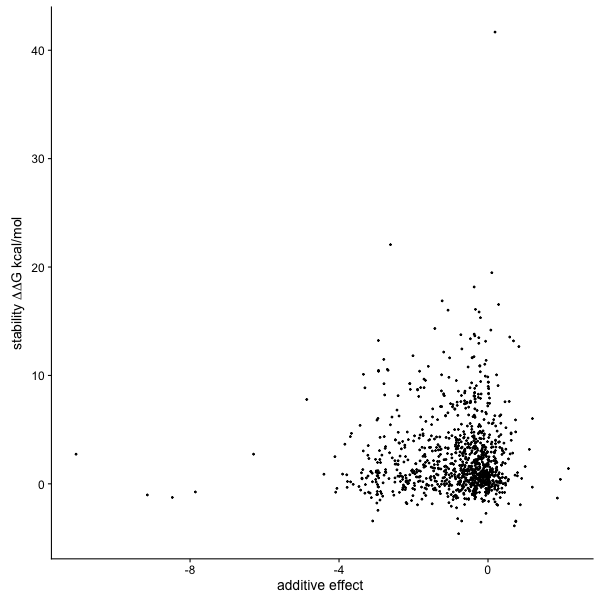

RCall.RObject{RCall.VecSxp}


In [26]:
using CSV
dsarki = CSV.read("DeltaDelta_G_vs_hidden_value.csv")
rename!(dsarki, :mPosition => :pos)
rename!(dsarki, :mTo => :aa)
bstab = join(DataFrame(aa=data[:aa], pos=data[:pos], b=m[:b][2:end], bg=m[:bg]), dsarki, kind=:inner, on=[:pos, :aa])
bstab[:yhat] = GlobalEpistasis.monosplinebasis1(m[:b][1] + bstab[:b], m[:knots], 3)[2]*m[:a]

R"""
print(cor.test($bstab$b, $bstab$delta_deltaG))
plot.ddg = qplot(data=$bstab, x=bg, y=delta_deltaG, size=I(.5)) +
xlab("additive effect ") +
ylab(expression(paste("stability ", Delta, Delta, "G kcal/mol")))
"""


# hypothesis tests

## nonepistatic vs global

In [ ]:
dl_lin_nonlin = lrt(1000, mlin, 
            m -> boot(m), 
            m -> fit(m))
mean(dl_lin_nonlin .> m[:ll]-mlin[:ll])

## test slopes = 0

In [ ]:
@time m01 = fit(mlin, a_upper_bound = [0.0, Inf], tol=1e-12)
@time m10 = fit(mlin, a_upper_bound = [Inf, 0.0], tol=1e-12)

In [ ]:
dl_m01_m11 = lrt(1000, m01, 
            m -> boot(m, tol=1e-12), 
            m -> fit(m, a_upper_bound=[Inf, Inf], tol=1e-12))

In [28]:
mean(dl_m01_m11 .> m11[:ll]-m01[:ll])

0.005

In [ ]:
dl_m10_m11 = lrt(1000, m10, 
            m -> boot(m, tol=1e-12), 
            m -> fit(m, a_upper_bound=[Inf, Inf], tol=1e-12))

In [33]:
mean(dl_m10_m11 .> m11[:ll]-m10[:ll])

0.0

# testing robustness to initial conditions

## randomize betas from nonepistatic model

In [38]:
mi = copy(mlin)
mi[:b] = mi[:b] +  randn(length(mi[:b]))/100
@time m_r = fit(mi)

444.986971 seconds (2.50 G allocations: 56.445 GiB, 4.41% gc time)


Dict{Symbol,Any} with 15 entries:
  :b             => [29.7498, -4.55727, -1.26924, -1.82106, -1.32385, -1.33524,…
  :knots         => 0.0:0.3333333333333333:1.0
  :r2            => 0.972022
  :prediction    => 51715×3 DataFrames.DataFrame…
  :phi           => [29.7498, 0.196861, -8.75937, -46.169, 25.2393, 17.5672, -2…
  :yhat          => [0.02734, -2.27652, -2.27927, -2.29088, -0.0573925, -0.2015…
  :sigma2        => 0.00538709
  :sigma2p       => 0.0266679
  :data          => Dict{Symbol,Any}(Pair{Symbol,Any}(:ham, [0, 1, 5, 4, 1, 4, …
  :a_upper_bound => [Inf, Inf]
  :nlopt_return  => :FTOL_REACHED
  :a             => [-2.27655, 3.44855e-5, 0.0, 0.0, 1.76169, 0.00208728]
  :rmse          => 0.177076
  :beta          => 1810×3 DataFrames.DataFrame…
  :ll            => 64026.9

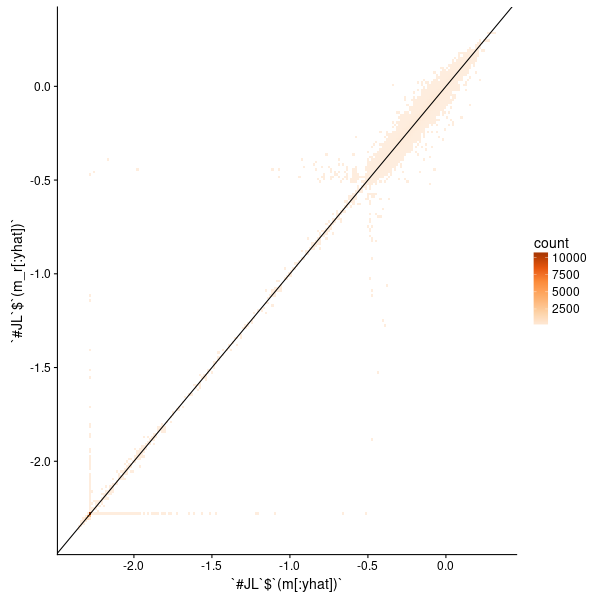

RCall.RObject{RCall.VecSxp}


In [41]:
R"""
qplot(x=$(m[:yhat]), y=$(m_r[:yhat]), geom = "bin2d", bins=200) +
scale_fill_distiller(palette=7, direction=1) + geom_abline()
"""

## initial beta = -1

In [24]:
mi = copy(m)
mi[:b] = -ones(mi[:b])
mi[:b][1] = 0
@time m_m1 = fit(mi)

 16.270447 seconds (87.00 M allocations: 2.023 GiB, 5.29% gc time)


Dict{Symbol,Any} with 15 entries:
  :b             => [-8.23743, -0.363688, -0.0798594, 0.517569, -0.476532, 0.00…
  :knots         => 0.0:0.3333333333333333:1.0
  :r2            => 0.718635
  :prediction    => 51715×3 DataFrames.DataFrame…
  :phi           => [-8.23743, -12.0515, -12.6822, -16.2732, -9.2535, -9.71579,…
  :yhat          => [-0.116954, -1.34636, -1.54962, -2.70711, -0.444462, -0.593…
  :sigma2        => 0.0976938
  :sigma2p       => 0.224374
  :data          => Dict{Symbol,Any}(Pair{Symbol,Any}(:ham, [0, 1, 5, 4, 1, 4, …
  :a_upper_bound => [Inf, Inf]
  :nlopt_return  => :SUCCESS
  :a             => [2.53821, 0.0358144, 0.0, 0.0, 0.947223, 0.0]
  :rmse          => 0.561712
  :beta          => 1810×3 DataFrames.DataFrame…
  :ll            => 4316.01

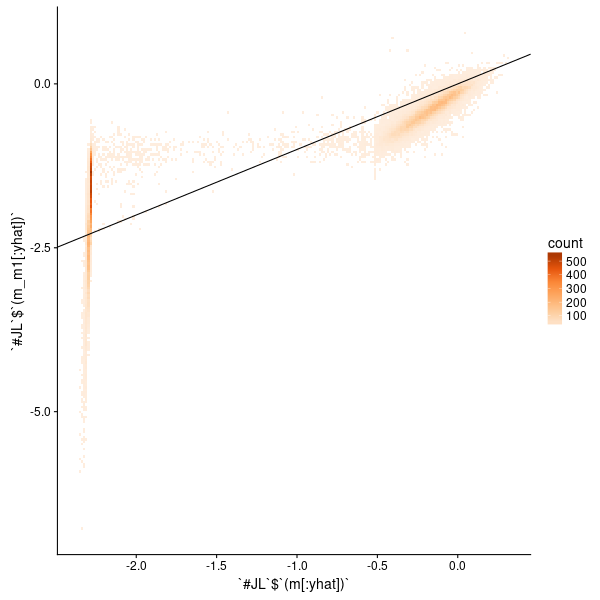

RCall.RObject{RCall.VecSxp}


In [31]:
R"""
qplot(x=$(m[:yhat]), y=$(m_m1[:yhat]), geom = "bin2d", bins=200) +
scale_fill_distiller(palette=7, direction=1) + geom_abline()
"""

## initial beta = 0

In [32]:
mi = copy(m)
mi[:b] = zeros(mi[:b])
@time m_0 = fit(mi)

  3.012495 seconds (33.96 M allocations: 798.015 MiB, 9.06% gc time)


Dict{Symbol,Any} with 15 entries:
  :b             => [-0.265121, -0.0117073, -0.00186905, 0.0181944, -0.0175915,…
  :knots         => 0.0:0.3333333333333333:1.0
  :r2            => 0.718827
  :prediction    => 51715×3 DataFrames.DataFrame…
  :phi           => [-0.265121, -0.390022, -0.408275, -0.528145, -0.30304, -0.3…
  :yhat          => [-0.15404, -1.36978, -1.54744, -2.71421, -0.523128, -0.6530…
  :sigma2        => 0.314986
  :sigma2p       => 1.00463e-23
  :data          => Dict{Symbol,Any}(Pair{Symbol,Any}(:ham, [0, 1, 5, 4, 1, 4, …
  :a_upper_bound => [Inf, Inf]
  :nlopt_return  => :SUCCESS
  :a             => [2.42653, 1.08151, 0.0, 0.0, 1.76843, 0.00141469]
  :rmse          => 0.561344
  :beta          => 1810×3 DataFrames.DataFrame…
  :ll            => 3993.28

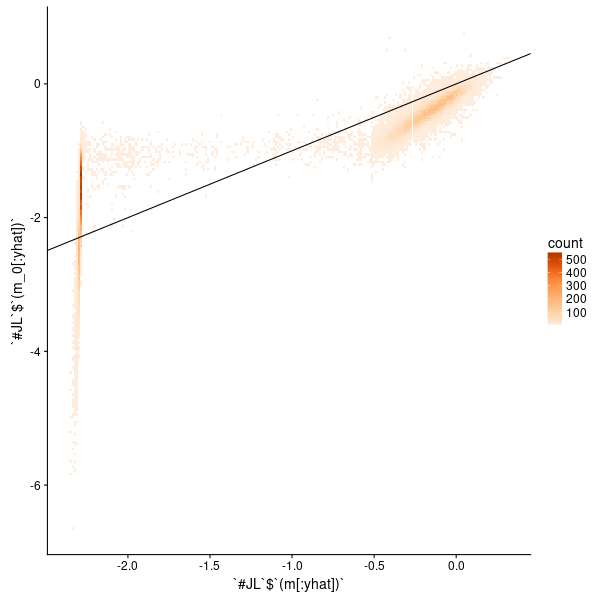

RCall.RObject{RCall.VecSxp}


In [33]:
R"""
qplot(x=$(m[:yhat]), y=$(m_0[:yhat]), geom = "bin2d", bins=200) +
scale_fill_distiller(palette=7, direction=1) + geom_abline()
"""